
Introduction :

Welcome to the Sales Price Prediction Notebook! In this notebook, we will explore the world of predictive analytics using a linear regression , Ridge regression and Lasso Regression models to predict sales prices based on advertising spending. Sales prediction is a critical task for businesses as it allows them to make informed decisions about their marketing budgets and strategies.

Dataset: 

For this analysis, we will be using the "Advertising" dataset, which contains data on advertising budgets spent on three different media channels (TV, Radio, and Newspaper) and the corresponding sales figures. This dataset provides an excellent opportunity to understand how different advertising channels impact sales and build a predictive model to estimate future sales based on advertising expenditures.

    Author   : Aditya Raj Sisodiya
    linkedin : https://www.linkedin.com/in/adityarajsisodiya/

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading sales data into pandas dataframe
df=pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

In [3]:
#check the shape of the dataset
df.shape

(200, 5)

In [4]:
#print first 5 row of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#print concise summary about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#print the unique values of the Unamed : 0 column
df["Unnamed: 0"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

It seems like unnamed : 0 column is a index column of a dataset so here i am dropping it because it won't play and role in our analysis.

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True) #drop Unnamed: 0 column

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Exploratory Data Analysis 

In [9]:
#check for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#check for duplicate records
df.duplicated().sum()

0

In [11]:
#print descriptive summary of the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


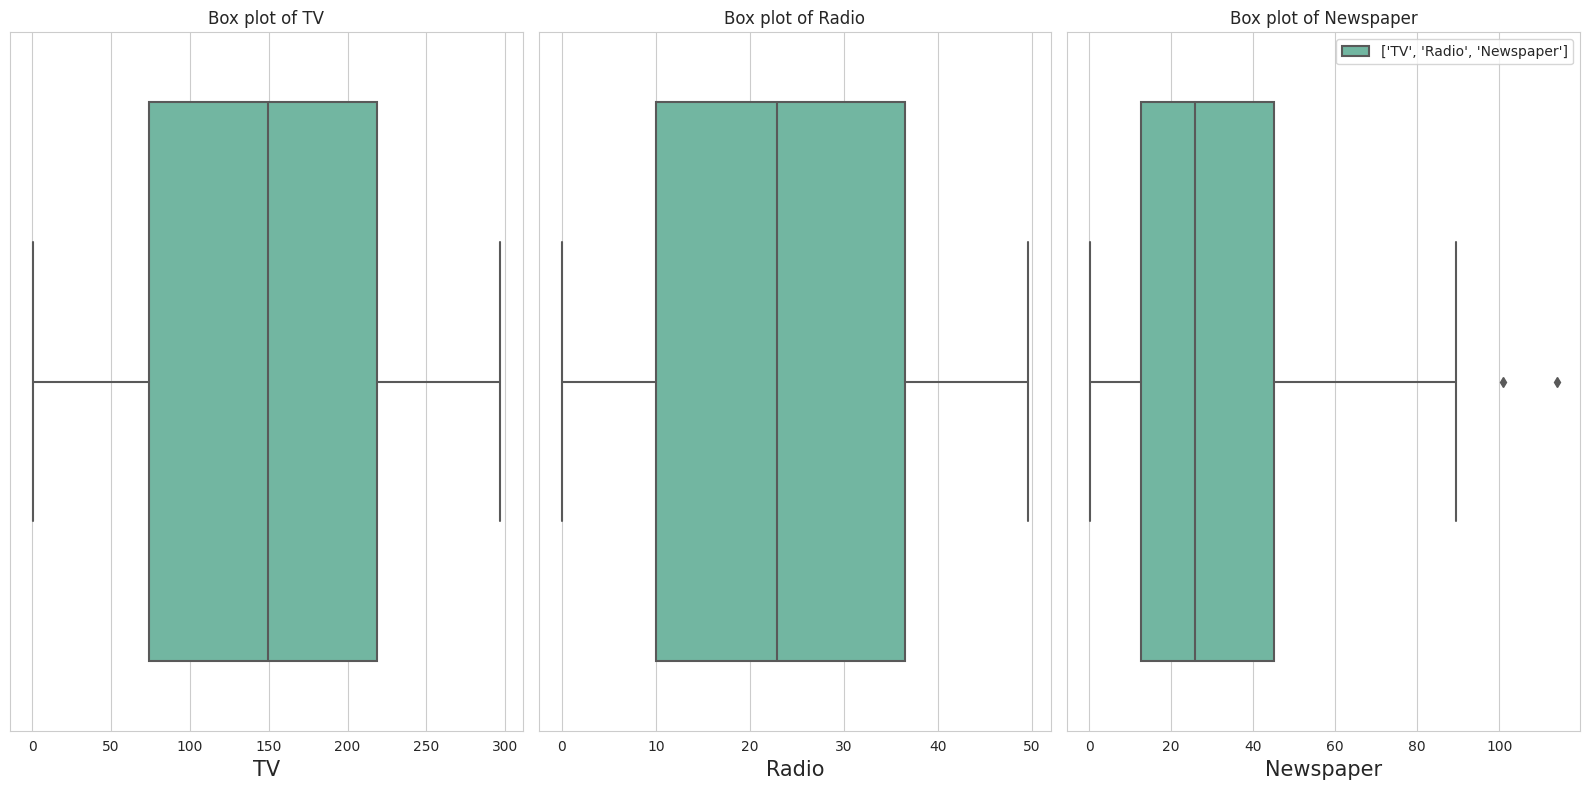

In [12]:
#visualize box plot for TV , Radio and Newspaper
plt.figure(figsize=(16,8))
columns=[col for col in df.columns if col!="Sales"]
for index,col in enumerate(columns):
    plt.subplot(1,3,index+1)
    sns.boxplot(x=col,data=df,palette="Set2")
    plt.xticks(size=10)
    plt.title("Box plot of {}".format(col))
    plt.xlabel(col,size=15)
plt.tight_layout()
plt.legend([columns])
plt.show()

by analysing  box plot of each feature, we can see there are 2 outliers present in newspaper column

In [13]:
#remove outlier using IQR

Q1=df["Newspaper"].quantile(0.25)
Q3=df["Newspaper"].quantile(0.75)

IQR=Q3-Q1
k=1.5

lower_boundry=Q1-k*IQR
upper_boundry=Q3+k*IQR

print("Shape before outlier removal : {}".format(df.shape))

df=df[((df["Newspaper"]>lower_boundry) & (df["Newspaper"]<upper_boundry))]
print("Shape after outlier removal : {}".format(df.shape))

Shape before outlier removal : (200, 4)
Shape after outlier removal : (198, 4)


as we can see by using IQR outlier removal method we have successfully remove both the outliers

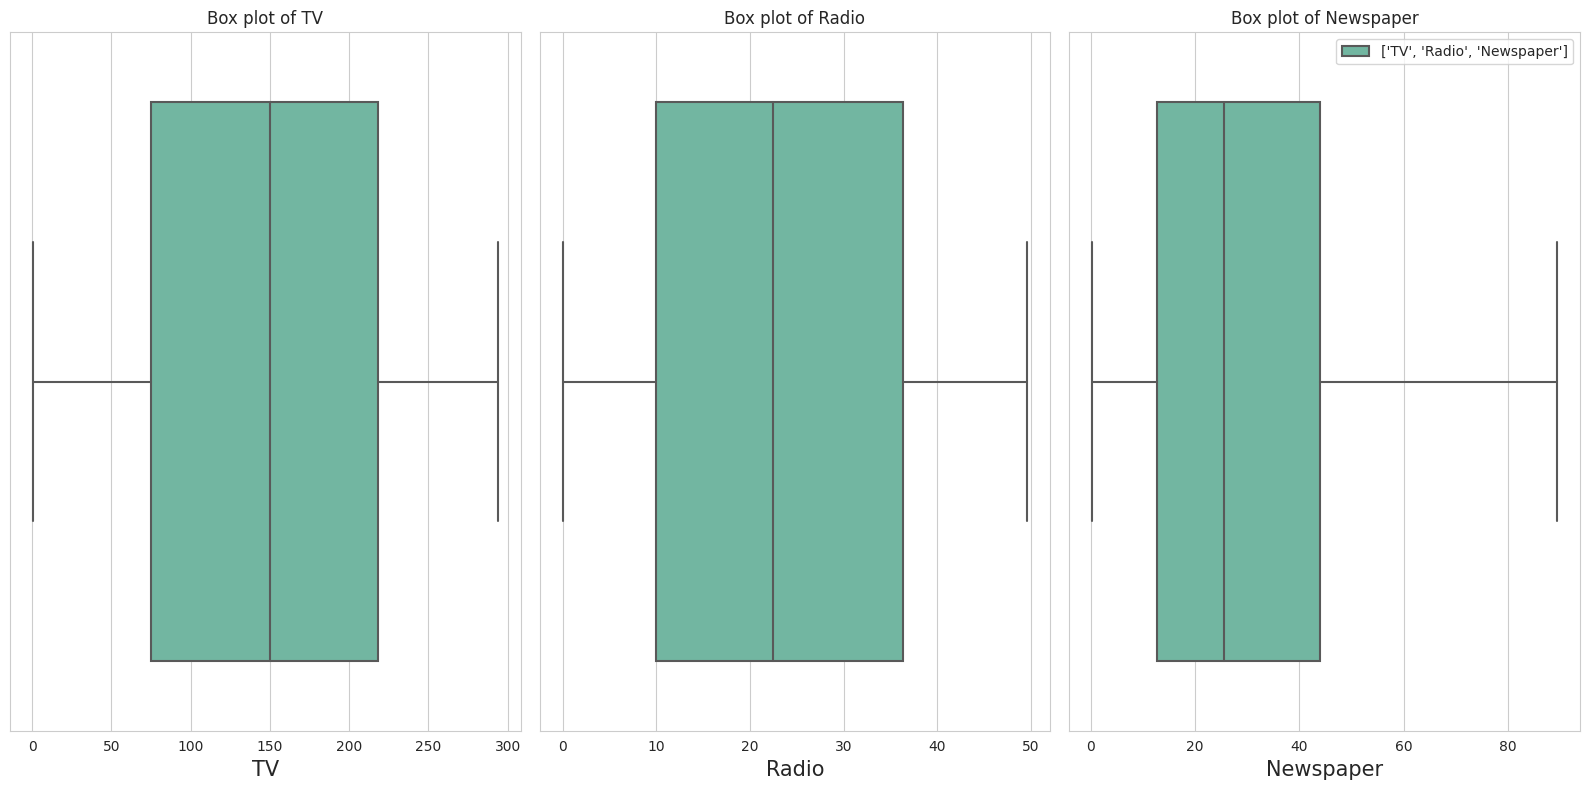

In [14]:
#visualize box plot for TV , Radio and Newspaper
plt.figure(figsize=(16,8))
columns=[col for col in df.columns if col!="Sales"]
for index,col in enumerate(columns):
    plt.subplot(1,3,index+1)
    sns.boxplot(x=col,data=df,palette="Set2")
    plt.xticks(size=10)
    plt.title("Box plot of {}".format(col))
    plt.xlabel(col,size=15)
plt.tight_layout()
plt.legend([columns])
plt.show()

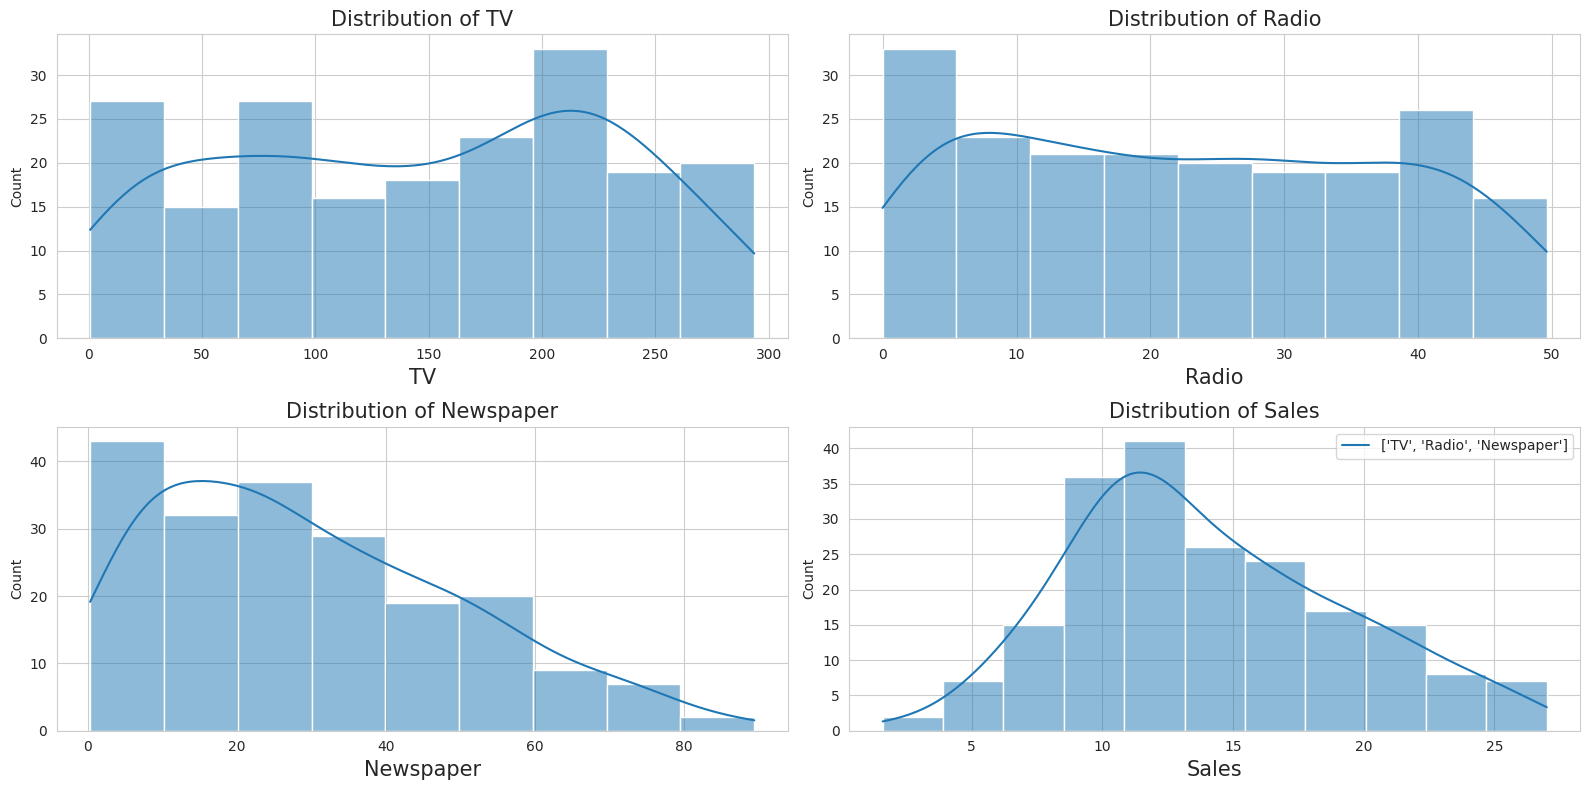

In [15]:
#visualize the histogram to check the distribution of each column.
plt.figure(figsize=(16,8))
for index,col in enumerate(df.columns):
    plt.subplot(2,2,index+1)
    sns.histplot(x=col,data=df,palette="pastel",kde=True)
    plt.xticks(size=10)
    plt.title("Distribution of {}".format(col),size=15)
    plt.xlabel(col,size=15)
plt.tight_layout()
plt.legend([columns])
plt.show()

by analysing the histogram of each plot we can see our sales column is nearly follow gaussian distribution compare to other variables.

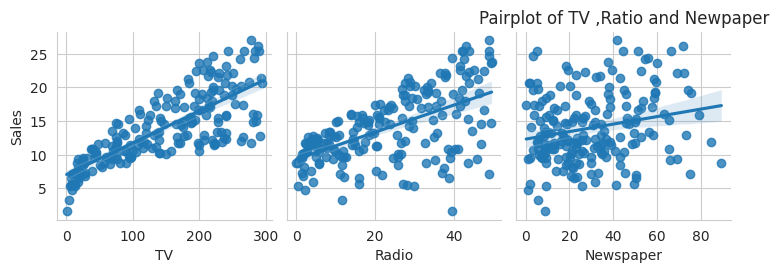

In [16]:
#visualize the pairplot 
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars="Sales",kind="reg")
plt.title("Pairplot of TV ,Ratio and Newpaper")
plt.show()

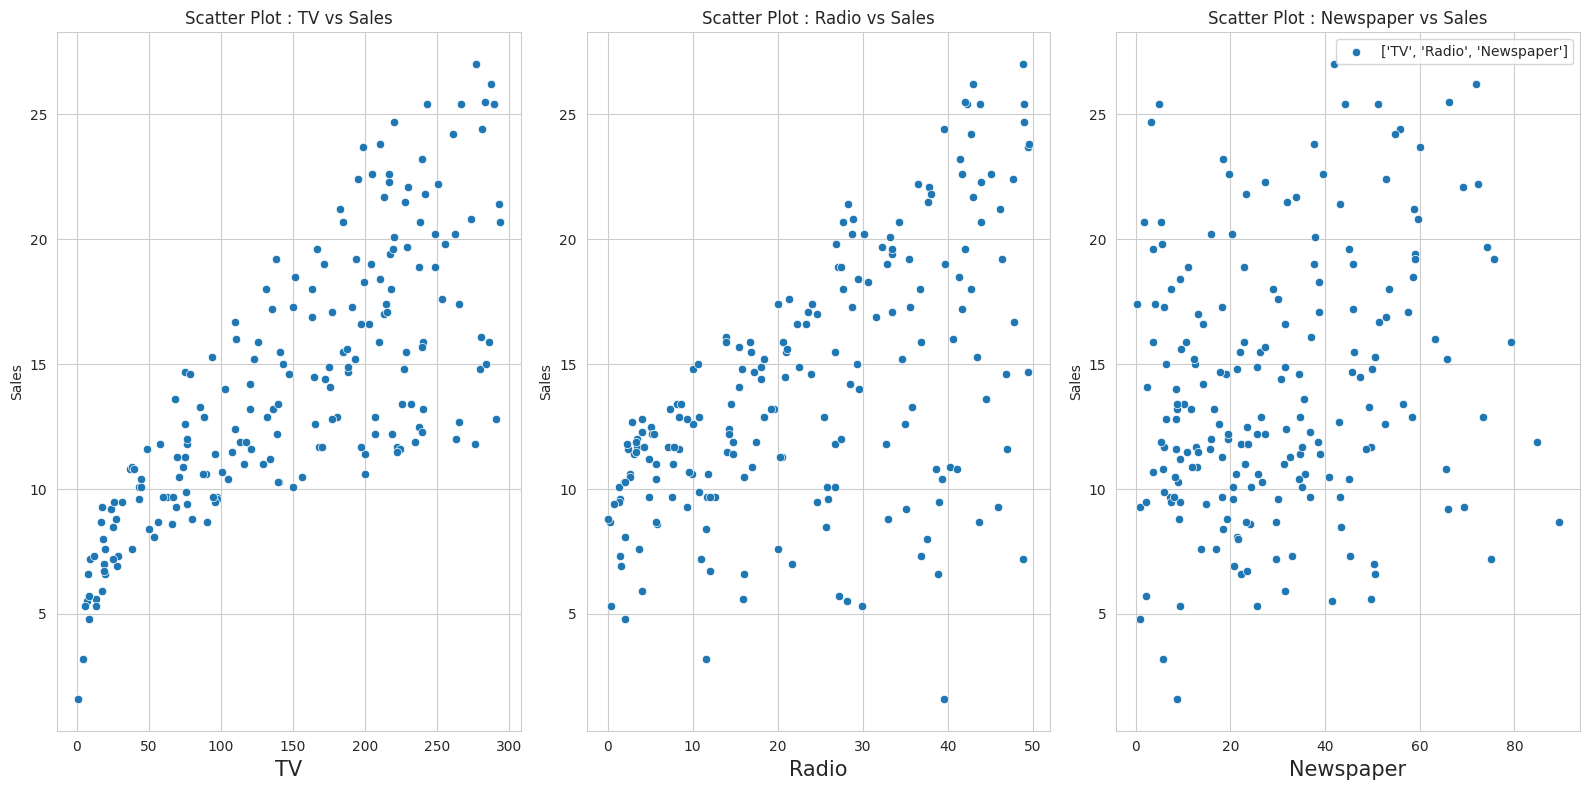

In [17]:
#visualize the scatter plot of each plot with Target Variable (Sales)
plt.figure(figsize=(16,8))
columns=[col for col in df.columns if col!="Sales"]
for index,col in enumerate(columns):
    plt.subplot(1,3,index+1)
    sns.scatterplot(x=col,y='Sales',data=df,markers="o")
    plt.xticks(size=10)
    plt.title("Scatter Plot : {} vs Sales".format(col))
    plt.xlabel(col,size=15)
plt.tight_layout()
plt.legend([columns])
plt.show()

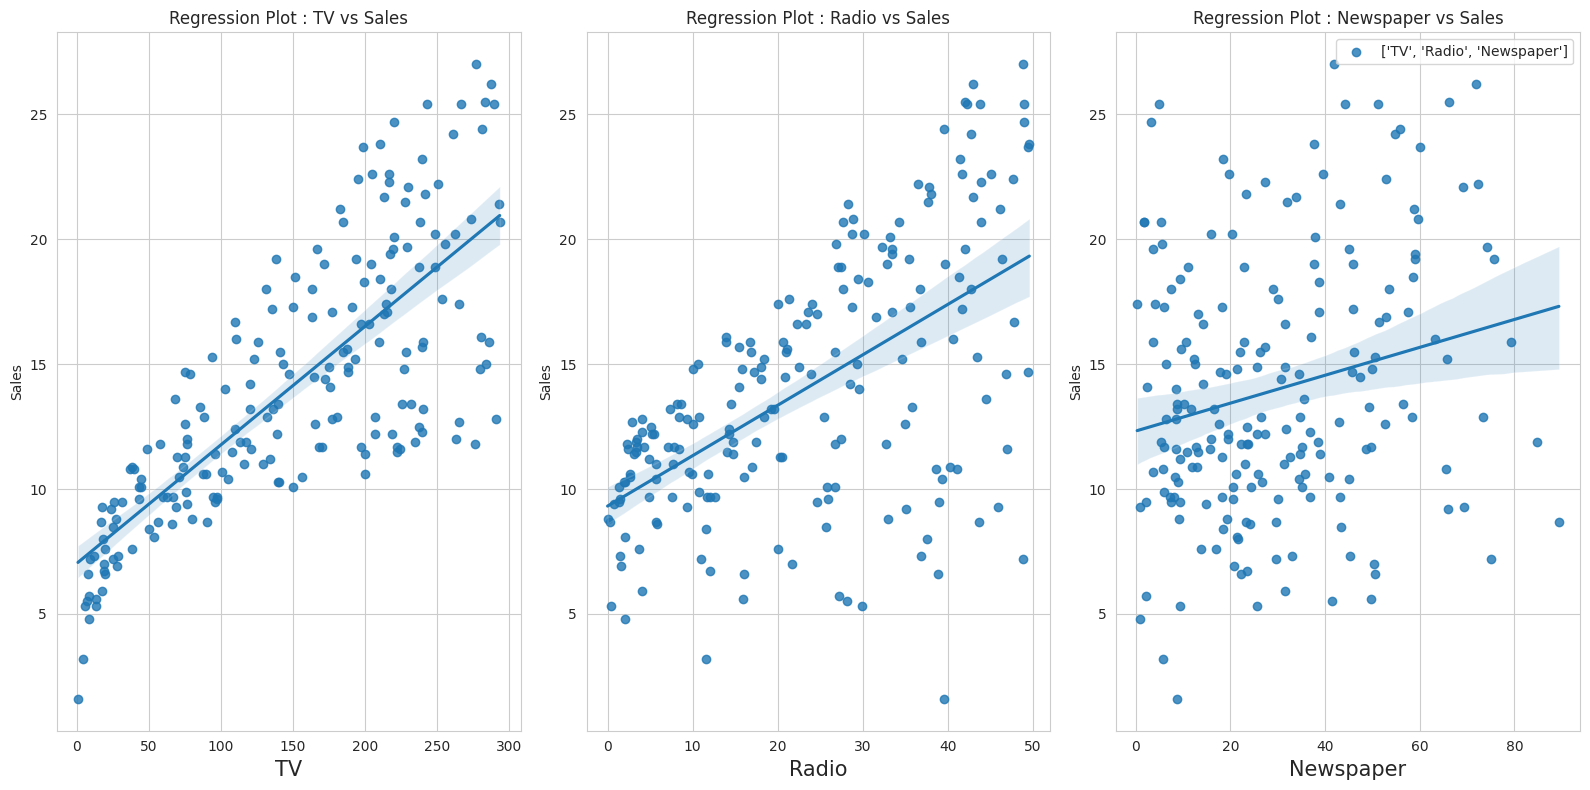

In [18]:
#visualize the regression plot 
plt.figure(figsize=(16,8))
columns=[col for col in df.columns if col!="Sales"]
for index,col in enumerate(columns):
    plt.subplot(1,3,index+1)
    sns.regplot(x=col,y='Sales',data=df,marker="o")
    plt.xticks(size=10)
    plt.title("Regression Plot : {} vs Sales".format(col))
    plt.xlabel(col,size=15)
plt.tight_layout()
plt.legend([columns])
plt.show()

by analysing the pairpot , scatter plot and regression plot we can say ratio and tv column is more correlated to sales compare to Newspaper

In [19]:
#Log transformation of newspaper column
df["Newspaper"]=np.log2(df["Newspaper"])

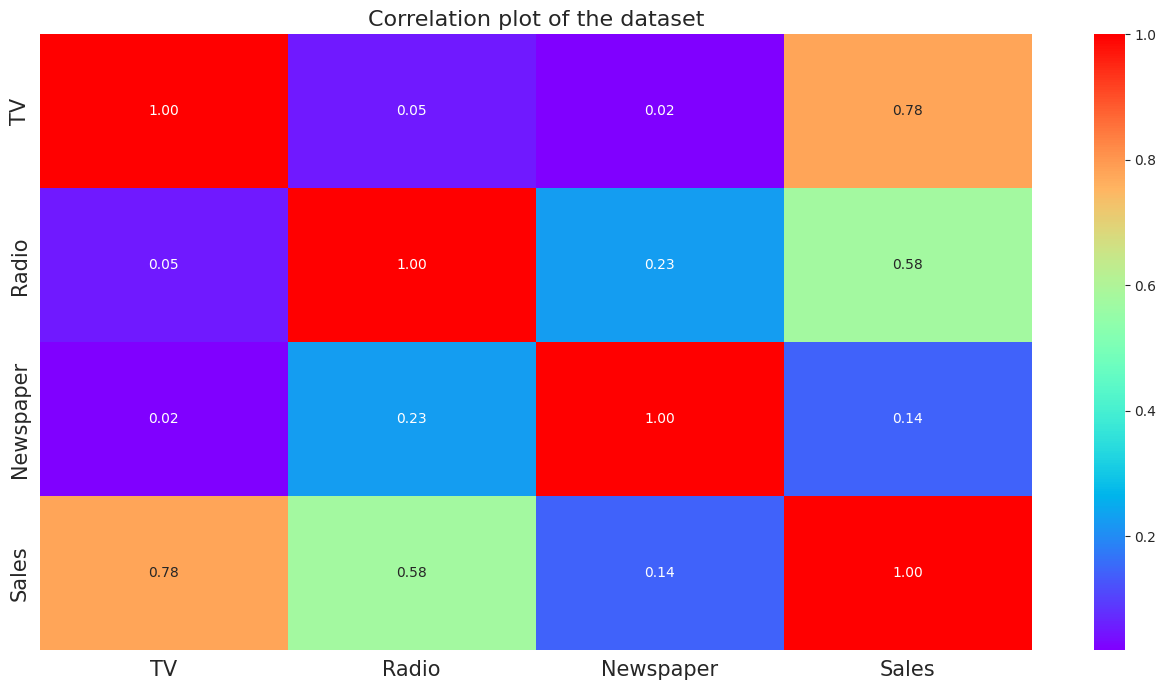

In [20]:
#visualize the corelation between variables.
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap="rainbow",fmt=".2f")
plt.title("Correlation plot of the dataset",size=16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Model Buillding

In [21]:
#seperating x and y
x=df.drop("Sales",axis=1)
y=df["Sales"]

In [22]:
#split data into train and set set into 80:20 ration
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((158, 3), (158,), (40, 3), (40,))

In [23]:
#import models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#import Regression performance metrics
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
def evaluate_model_performance(model,x_test,y_test):
    y_pred=model.predict(x_test)
    print("MSE : ",)
    print("RMSE : ",np.sqrt(np.round(mean_squared_error(y_test,y_pred),decimals=2)))
    print("R2 Score : ",np.round(r2_score(y_test,y_pred)*100,decimals=2))

In [25]:
models={
    "lr": LinearRegression(),
    "ridge":Ridge(),
    "lasso":Lasso()
}

for name,model in zip(models.keys(),models.values()):
    model.fit(x_train,y_train)
    print("Training score of {} :  is : {}".format(name,model.score(x_train,y_train)))
    evaluate_model_performance(model,x_test,y_test)

Training score of lr :  is : 0.8940855609633656
MSE : 
RMSE :  1.6673332000533065
R2 Score :  89.75
Training score of ridge :  is : 0.8940855523084924
MSE : 
RMSE :  1.6673332000533065
R2 Score :  89.75
Training score of lasso :  is : 0.8930760577817805
MSE : 
RMSE :  1.6340134638368191
R2 Score :  90.16


by analysing the performance of above model by considering R2 score we can say Lasso Regression model is giving highest performance over other models so we are selecing lasso as our final model.

In [26]:
final_model=Lasso()
final_model.fit(x_train,y_train)
print("Training score : ",final_model.score(x_train,y_train))
evaluate_model_performance(final_model,x_test,y_test)

Training score :  0.8930760577817805
MSE : 
RMSE :  1.6340134638368191
R2 Score :  90.16


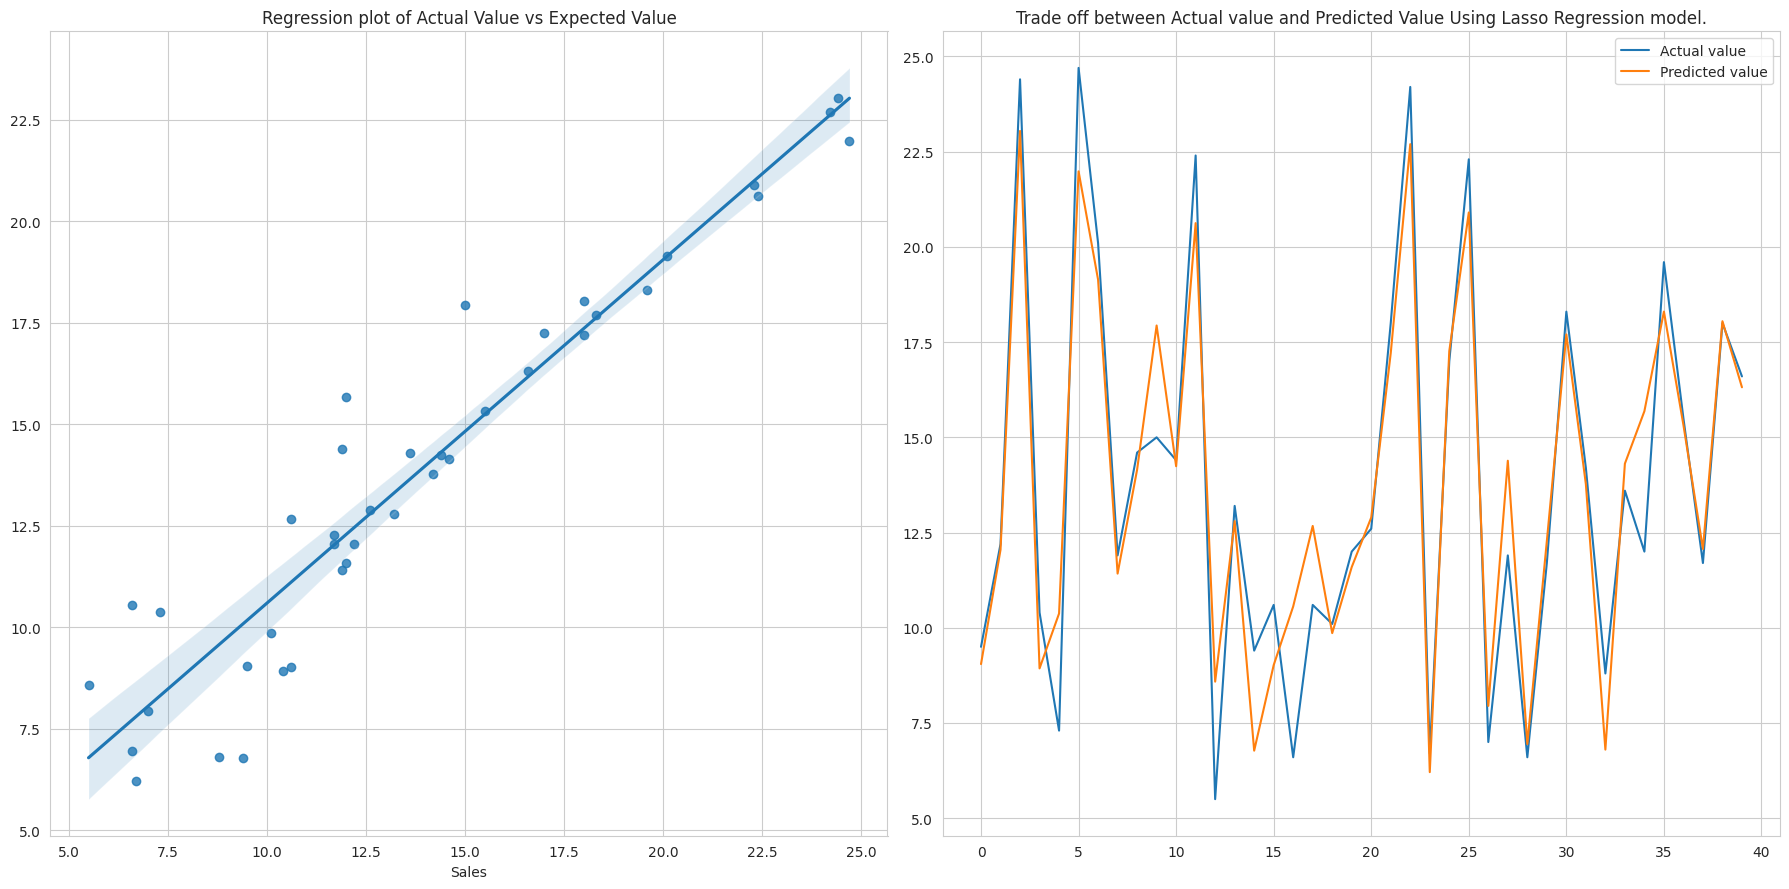

In [28]:
#visulize final model performance using regression and line plot
y_pred=final_model.predict(x_test)
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
sns.regplot(x=y_test,y=y_pred)
plt.title("Regression plot of Actual Value vs Expected Value")
plt.subplot(1,2,2)
plt.plot(np.arange(len(y_test)),y_test,label="Actual value")
plt.plot(np.arange(len(y_pred)),y_pred,label="Predicted value")
plt.title("Trade off between Actual value and Predicted Value Using Lasso Regression model.")
plt.legend()
plt.tight_layout()
plt.show()